# At what time does your favorite YouTubers upload videos? 
 
https://www.youtube.com/watch?v=-QMg39gK624&list=PLyb_C2HpOQSBJRh38CTPvsouV4SBpyt_H

In [1]:
from datetime import datetime, timedelta
from apiclient.discovery import build

In [2]:
YOUTUBE_DEVELOPER_KEY = 'xxxxxxxxxxxxxxxxxxxxxxxxxxxxx'
youtube = build('youtube', 'v3', developerKey=YOUTUBE_DEVELOPER_KEY)

In [3]:
def get_channel(channel_name):
    return youtube.search().list(q=channel_name, type='channel', part='id,snippet').execute()['items'][0]


def get_videos(channel_id, part='id,snippet', limit=10):
    res = youtube.channels().list(id=channel_id, 
                                  part='contentDetails').execute()
    playlist_id = res['items'][0]['contentDetails']['relatedPlaylists']['uploads']
    
    videos = []
    next_page_token = None
    
    while 1:
        res = youtube.playlistItems().list(playlistId=playlist_id, 
                                           part=part, 
                                           maxResults=min(limit, 50),
                                           pageToken=next_page_token).execute()
        videos += res['items']
        next_page_token = res.get('nextPageToken')
        
        if next_page_token is None or len(videos) >= limit:
            break

    return videos

def parse_publish_timestamp(video):
    return (datetime.strptime(video['snippet']['publishedAt'], "%Y-%m-%dT%H:%M:%S.000Z")
            + timedelta(hours=5, minutes=30))

In [4]:
channel_id = get_channel('t-series')['id']['channelId']

In [5]:
videos = get_videos(channel_id, limit=500)

In [6]:
publish_timestamps = [parse_publish_timestamp(video) for video in videos]

In [7]:
publish_times = [t.hour + t.minute/60 for t in publish_timestamps]

In [8]:
import matplotlib.pyplot as plt

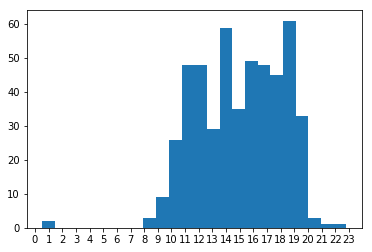

In [9]:
plt.hist(publish_times, bins=24)
plt.xticks(range(24))
plt.show()